In [1]:
import time
import random
import heapq
import numpy as np

from main import dijkstraMinHeap, dijkstraArray  # Import your existing functions

In [2]:
def generate_graph(V, density=0.3):
    """ Generates a random weighted graph as both adjacency matrix and adjacency list """
    graph_matrix = np.zeros((V, V), dtype=int)
    graph_list = {i: [] for i in range(V)}

    for i in range(V):
        for j in range(i + 1, V):
            if np.random.rand() < density:  # Control edge density
                weight = np.random.randint(1, 100)
                graph_matrix[i][j] = graph_matrix[j][i] = weight
                graph_list[i].append((j, weight))
                graph_list[j].append((i, weight))

    return graph_matrix.tolist(), graph_list

In [9]:
sizes = [10, 50, 100, 500, 1000, 5000, 10000]
density = 0.3
graph_data = {size: generate_graph(size, density) for size in sizes}


In [10]:
results = []
for size in sizes:
    graph_matrix, graph_list = graph_data[size]
    
    # Run Adjacency Matrix Version
    start_time = time.time()
    dijkstraArray(graph_matrix)
    matrix_time = time.time() - start_time

    # Run Adjacency List + Min-Heap Version
    start_time = time.time()
    dijkstraMinHeap(graph_list)
    heap_time = time.time() - start_time

    results.append((size, matrix_time, heap_time))
    print(f"Graph Size: {size} nodes")
    print(f"Adjacency Matrix Time: {matrix_time:.5f} sec")
    print(f"Adjacency List (Heap) Time: {heap_time:.5f} sec")
    print("-" * 40)

Graph Size: 10 nodes
Adjacency Matrix Time: 0.00000 sec
Adjacency List (Heap) Time: 0.00000 sec
----------------------------------------
Graph Size: 50 nodes
Adjacency Matrix Time: 0.00000 sec
Adjacency List (Heap) Time: 0.00100 sec
----------------------------------------
Graph Size: 100 nodes
Adjacency Matrix Time: 0.00100 sec
Adjacency List (Heap) Time: 0.00202 sec
----------------------------------------
Graph Size: 500 nodes
Adjacency Matrix Time: 0.02855 sec
Adjacency List (Heap) Time: 0.01081 sec
----------------------------------------
Graph Size: 1000 nodes
Adjacency Matrix Time: 0.11407 sec
Adjacency List (Heap) Time: 0.47895 sec
----------------------------------------
Graph Size: 5000 nodes
Adjacency Matrix Time: 2.68735 sec
Adjacency List (Heap) Time: 1.10446 sec
----------------------------------------
Graph Size: 10000 nodes
Adjacency Matrix Time: 10.49533 sec
Adjacency List (Heap) Time: 4.04397 sec
----------------------------------------


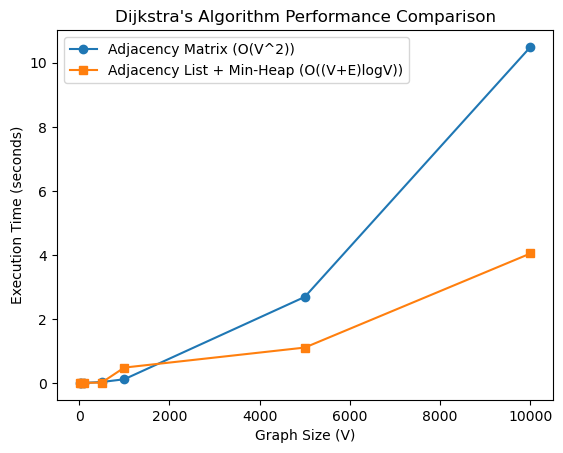

In [11]:
import matplotlib.pyplot as plt

sizes, matrix_times, heap_times = zip(*results)
plt.plot(sizes, matrix_times, label="Adjacency Matrix (O(V^2))", marker="o")
plt.plot(sizes, heap_times, label="Adjacency List + Min-Heap (O((V+E)logV))", marker="s")
plt.xlabel("Graph Size (V)")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Dijkstra's Algorithm Performance Comparison")
plt.show()